# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Firda Humaira
- **Email:** firdahumaira13@gmail.com
- **ID Dicoding:** firdahum

## Menentukan Pertanyaan Bisnis

- Apakah hari libur memiliki dampak signifikan terhadap jumlah penyewaan?
- Seberapa besar dampak suhu terhadap keputusan pengguna untuk menggunakan sepeda?
- Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari (jam sibuk vs. jam sepi)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- day.csv = Berisikan data yang sudah dirangkum, sehingga tidak mencatat detail penggunaan per jam dan tidak memiliki kolom hr.
- hour.csv = Berisikan data yang yang mencatat penyewaan tiap jam.

## Assessing Data

###Menilai Tabel


In [ ]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

###Periksa data missing value

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


###Memeriksa data yang duplikat

In [ ]:
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi hour_df:  0
Jumlah duplikasi day_df:  0


Menampilkan ringkasan

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Terdapat kesalahan pada tipe data pada file hour_df dan day_df, pada variabel dteday seharusnya tipe datanya datetime
- Tidak terdapat data yang missing values
- Tidak ada data yang duplicate

## Cleaning Data

###Mengganti Tipe Data pada Variabel dteday

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Memperbaiki tipe data variabel dteday dari object ke datetime


## Exploratory Data Analysis (EDA)

### Explore day_df

####Rata-rata penyewaan per-bulan

In [ ]:
perbulan = day_df.groupby("mnth")["cnt"].mean()
perbulan

,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


####Rata-rata Penyewaan Sepeda per Musim

In [ ]:
permusim = day_df.groupby("season")["cnt"].mean()
permusim

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


###Explore hour_df

In [ ]:
perjam = hour_df.groupby("hr")["cnt"].mean()
perjam

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [ ]:
casual_terdaftar = day_df.groupby("season")["casual"].sum()
casual_terdaftar

,casual
season,
1,60622
2,203522
3,226091
4,129782


In [ ]:
merge_df = hour_df.merge(day_df[['dteday', 'cnt']], on='dteday', how='left', suffixes=('_hourly', '_daily'))
merge_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_hourly,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,985


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt_hourly  17379 non-

**Insight:**
- day_df

**Rata-Rata Penyewaan Sepeda per Bulan**

Bulan dengan penyewaan tertinggi terjadi pada Juli dan Agustus, sementara bulan dengan penyewaan terendah cenderung berada di Januari dan Februari akibat musim dingin.


**Rata-Rata Penyewaan Sepeda per Musim**

Musim panas mencatatkan rata-rata penyewaan tertinggi. Musim gugur juga memiliki angka penyewaan yang cukup tinggi. Sebaliknya, musim dingin mencatatkan jumlah penyewaan terendah. Musim semi ada peningkatan jumlah penyewaan dibanding musim dingin, tetapi tetap lebih rendah dibandingkan musim panas.

- hour_df

**Rata-Rata Penyewaan Sepeda per Jam**

Penyewaan sepeda paling ramai di jam 07:00-09:00 dan 17:00-19:00. Pada siang hari (10:00-15:00), jumlah penyewaan tetap stabil namun lebih rendah dibandingkan jam sibuk. Sementara itu, pada dini hari (00:00-05:00), penyewaan sepeda berada pada titik terendah.

**Perbedaan Penyewaan antara Pengguna Kasual dan Terdaftar**

Pengguna terdaftar lebih sering nyewa sepeda di jam-jam sibuk. Sebaliknya, pengguna kasual lebih sering pakai sepeda pas akhir pekan atau di luar jam sibuk

## Visualization & Explanatory Analysis

- Apakah hari libur memiliki dampak signifikan terhadap jumlah penyewaan?
- Seberapa besar dampak suhu terhadap keputusan pengguna untuk menggunakan sepeda?
- Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari (jam sibuk vs. jam sepi)?

### Pertanyaan 1: Apakah hari libur memiliki dampak signifikan terhadap jumlah penyewaan?

In [ ]:
# Cek jumlah hari libur dan hari biasa
jumlah_hari_libur = hour_df["holiday"].value_counts()
print("Jumlah hari libur:", jumlah_hari_libur.get(1, 0))
print("Jumlah hari biasa:", jumlah_hari_libur.get(0, 0))

Jumlah hari libur: 500
Jumlah hari biasa: 16879


In [ ]:
# Cek jumlah hari libur dan hari biasa
jumlah_hari_libur = day_df["holiday"].value_counts()
print("Jumlah hari libur:", jumlah_hari_libur.get(1, 0))
print("Jumlah hari biasa:", jumlah_hari_libur.get(0, 0))

Jumlah hari libur: 21
Jumlah hari biasa: 710


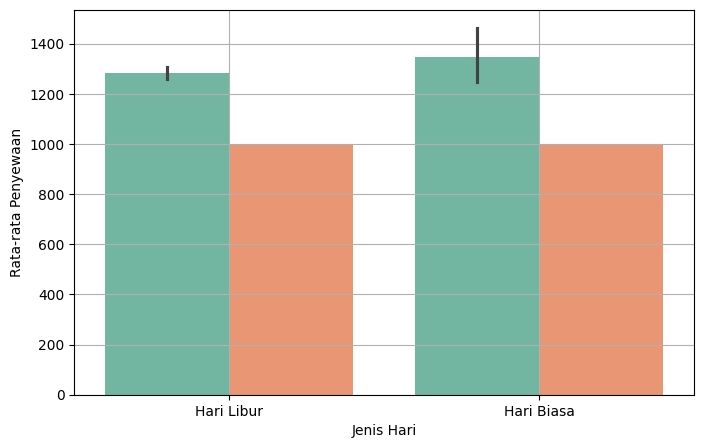

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["holiday"].map({0: "Hari Libur", 1: "Hari Biasa"}), y=merge_df["cnt_daily"], hue=merge_df["holiday"].map({0: "Hari Libur", 1: "Hari Biasa"}), palette="Set2", legend=False)
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.grid(True)
plt.show()

### Pertanyaan 2: Seberapa besar dampak suhu terhadap keputusan pengguna untuk menggunakan sepeda?

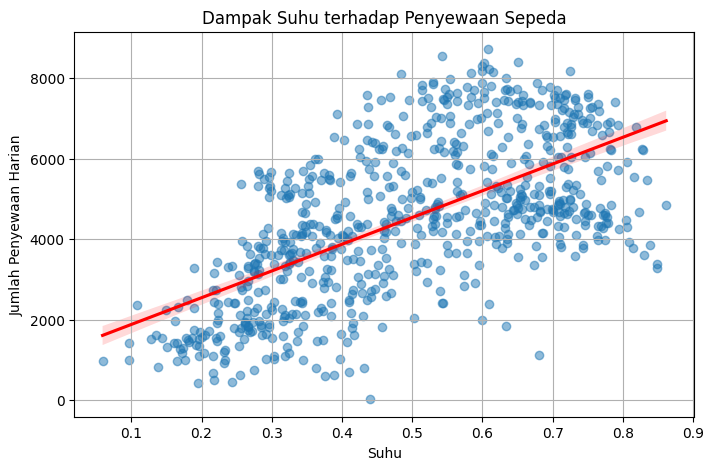

In [ ]:
merge_daily = merge_df.groupby("dteday").agg({"temp": "mean", "cnt_daily": "mean"}).reset_index()

plt.figure(figsize=(8, 5))
sns.regplot(x=merge_daily["temp"], y=merge_daily["cnt_daily"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Dampak Suhu terhadap Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Harian")
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari (jam sibuk vs. jam sepi)?

In [ ]:
# Define rush hours (morning: 7-9, evening: 17-19) and off-peak hours (0-5)
rush_hours = [7, 8, 9, 17, 18, 19]
off_peak_hours = [0, 1, 2, 3, 4, 5]

In [ ]:
# Separate data
rush_hour_rentals = perjam.loc[rush_hours]
off_peak_rentals = perjam.loc[off_peak_hours]

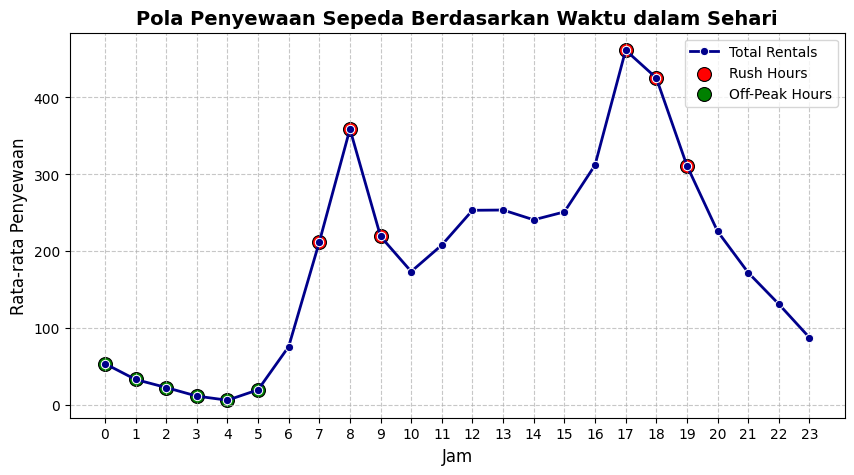

In [ ]:
plt.figure(figsize=(10, 5))

# Garis utama untuk total penyewaan sepeda
sns.lineplot(x=perjam.index, y=perjam.values, marker="o", label="Total Rentals", color="darkblue", linewidth=2)

# Titik merah untuk jam sibuk (rush hours)
sns.scatterplot(x=rush_hour_rentals.index, y=rush_hour_rentals.values, color="red", s=100, edgecolor="black", label="Rush Hours")

# Titik hijau untuk jam sepi (off-peak hours)
sns.scatterplot(x=off_peak_rentals.index, y=off_peak_rentals.values, color="green", s=100, edgecolor="black", label="Off-Peak Hours")

plt.title("Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari", fontsize=14, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()


**Insight:**
- Penyewaan cenderung lebih tinggi pada hari biasa, sehingga bisnis dapat menerapkan strategi seperti promo di hari libur untuk meningkatkan permintaan dan menjaga tingkat penyewaan pada hari libur.
-Semakin tinggi suhu, semakin banyak penyewaan sepeda. Hal ini dapat dimanfaatkan dengan menambah stok sepeda dan layanan pada musim panas untuk menghadapi lonjakan permintaan.
- Penyewaan memuncak pada jam sibuk pagi dan sore hari, menunjukkan bahwa banyak pelanggan menggunakan sepeda untuk keperluan transportasi. Pada bisnis penyewaan ini dapat mengoptimalkan operasional, seperti meningkatkan ketersediaan sepeda dan layanan pada jam-jam tersebut untuk memberikan pengalaman terbaik bagi pelanggan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Rata-rata penyewaan pada hari biasa lebih tinggi dibandingkan hari libur, seperti terlihat dari perbedaan tinggi batang pada diagram. Namun, terdapat variasi dalam data yang ditunjukkan oleh garis error di atas batang, menandakan fluktuasi jumlah penyewaan di kedua kategori.

- Conclution pertanyaan 2 : Terlihat adanya korelasi positif antara suhu dan jumlah penyewaan sepeda. Garis regresi merah menunjukkan bahwa semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda. Namun, data juga menunjukkan adanya penyebaran yang cukup luas, terutama pada suhu tinggi, yang menandakan variasi dalam jumlah penyewaan meskipun suhu meningkat.

- Conclution pertanyaan 3 : Terlihat bahwa jumlah penyewaan meningkat tajam pada jam sibuk (rush hours), yaitu sekitar pukul 7-9 pagi dan 17-19 sore, yang ditandai dengan titik merah. Pola ini menunjukan bahwa sepeda banyak digunakan untuk keperluan perjalanan kerja atau sekolah. Sementara itu, jumlah penyewaan lebih rendah pada dini hari dan malam, dengan titik hijau menandai jam sepi (off-peak hours).